

**Student Name**: DONGDAO

<h2 id="import_data">1. Import Data</h2>

Import libraries

In [1]:
import pandas as pd
import numpy as np

load data and store in dataframe df:

In [133]:
df = pd.read_csv('./palmerpenguins DatasetFolder-20220605/penguins_size.csv')

In [134]:
df.shape

(344, 7)

In [135]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<h2 id="import_data">2. Data processing</h2>

**show NaN and empty value**

In [136]:
# replace empty value or blank value to NaN
df.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)

In [137]:
df.isnull()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [138]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

**drop NaN data**

In [139]:
df.dropna(inplace = True )

**check outlier**

show data type and choose attributes which may have outlier data. 'int64' or 'float64' usually have outlier data

In [140]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

**import plot libraries**

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**use boxplot check outlier one by one**

use boxplot, if the plot doesn't have outlier points, we can get that the attribute is normal

<AxesSubplot:>

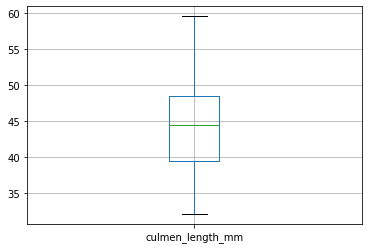

In [142]:
df[["culmen_length_mm"]].boxplot()

<AxesSubplot:>

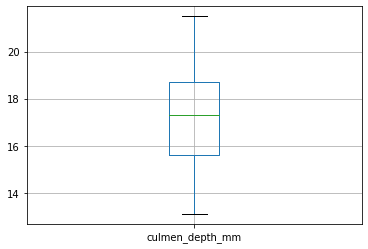

In [143]:
df[["culmen_depth_mm"]].boxplot()

<AxesSubplot:>

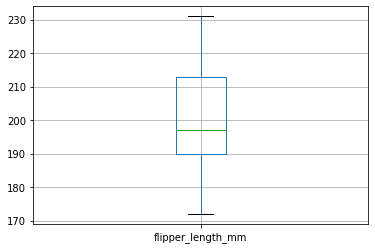

In [144]:
df[["flipper_length_mm"]].boxplot()

<AxesSubplot:>

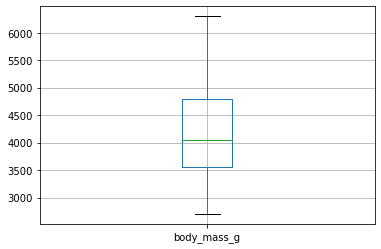

In [145]:
df[["body_mass_g"]].boxplot()

from above plots, we can know that these polts don't have any outlier. so these attributes are all normal data

**check categorical data**

In [146]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [147]:
df["island"].value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [148]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

"sex" data has a abnormal data. Find and delete it.

In [149]:
df.loc[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [150]:
# drop row which value of sex == .
df.drop(index=[336],inplace = True)

after above processing, we can get the clean data

In [152]:
df.shape

(333, 7)

<h2 id="import_data">3. Exploratory data analysis </h2>

<h3>3.1 Continuous numerical variables:</h3> 

use corr to check correlation between variables of type "float64"

In [153]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


**"corr"** method show the correlation between some variables("int64" or "float64"), the range of result is [-1,1]. The closer to -1, the negative correlation. The closer to 1, the positive corrlation.

let's check the relationship between an individual variable and the body_mass_g.

By using "regplot", which plots the scatterplot plus the fitted regression line for for the data

<AxesSubplot:xlabel='body_mass_g', ylabel='culmen_length_mm'>

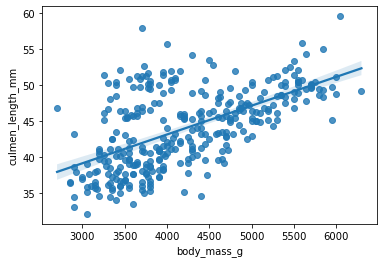

In [154]:
# culment length and body mass
sns.regplot(x="body_mass_g",y="culmen_length_mm",data=df)

as we can see, the body_mass_g goes up, the culmen_length_mm goes up. Since the trend of the line is goes up, body_mass_g seems like a good predictor of culmen_length_mm. It's positive correlation.

Check other factors with body_mass_g.

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

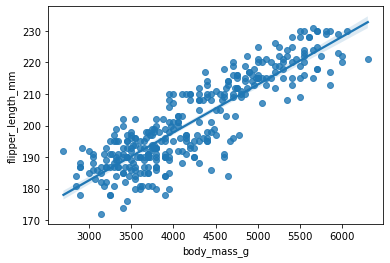

In [155]:
# flipper_length_mm and body_mass_g
sns.regplot(x="body_mass_g",y="flipper_length_mm",data=df)

the Plot is the same as the culmen_length_mm with body_mass_g but more positvie. The regression line is almost a perfect diagonal line mean that body_mass_g is a pretty good predictor of flipper_length_mm. It has strong positvie.

let's show the correlation by using "corr" method between "flipper_length_mm" and "body_mass_g"

In [156]:
df[["flipper_length_mm","body_mass_g"]].corr()

,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.872979
body_mass_g,0.872979,1.000000


The result almostly reach to 1. It's 0.873211.

<AxesSubplot:xlabel='body_mass_g', ylabel='culmen_depth_mm'>

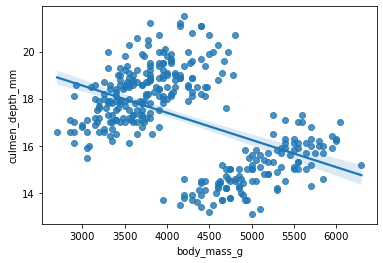

In [157]:
# culmen_depth_mm and body_mass_g
sns.regplot(x="body_mass_g",y="culmen_depth_mm",data=df)

In [158]:
df[["culmen_depth_mm","body_mass_g"]].corr()

,culmen_depth_mm,body_mass_g
culmen_depth_mm,1.000000,-0.472016
body_mass_g,-0.472016,1.000000


from the plot and the table, we can know that the culmen_depth_mm and body_mass_g is a negative correlation.

**Weak Linear Relationship**

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

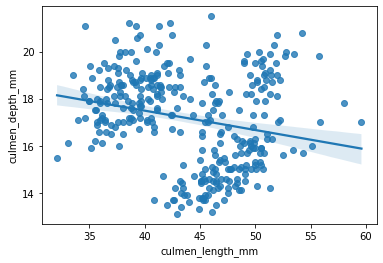

In [159]:
# culmen_length_mm culmen_depth_mm
sns.regplot(x="culmen_length_mm",y="culmen_depth_mm",data=df)

In [160]:
df[["culmen_length_mm","culmen_depth_mm"]].corr()

,culmen_length_mm,culmen_depth_mm
culmen_length_mm,1.000000,-0.228626
culmen_depth_mm,-0.228626,1.000000


From the plot, culmen_length_mm and culmen_depth_mm has a weak relationship. And the data points aare very scattered and far from the fitted line. It seems like culmen_length_mm is not a predictor of culmen_depth_mm. The result of "corr" method is close to 0 means that it has a weak correlation.

<h3>3.2 Categorical variables:</h3> 

The data has some categorical variables. It has species, island, sex. And the data type is "object"

Show the relationship between "species" and "culmen_length_mm"

<AxesSubplot:xlabel='species', ylabel='culmen_length_mm'>

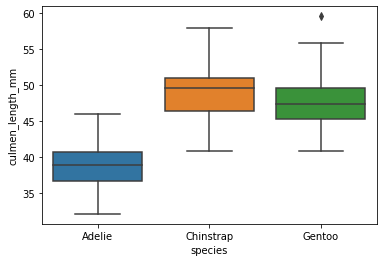

In [161]:
sns.boxplot(x="species", y="culmen_length_mm", data=df)

Show the relationship between "sex" and "culmen_length_mm"

<AxesSubplot:xlabel='sex', ylabel='culmen_length_mm'>

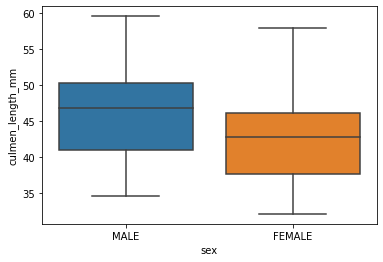

In [162]:
sns.boxplot(x="sex", y="culmen_length_mm", data=df)

Show the relationship between "island" and "culmen_length_mm"

<AxesSubplot:xlabel='island', ylabel='culmen_length_mm'>

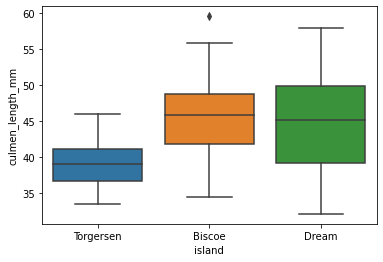

In [163]:
sns.boxplot(x="island", y="culmen_length_mm", data=df)

We examine the relationship between "species", "sex", "island" and "culmen_length_mm". These plots all hava a overlap. So "species", "sex" and "island" are not a good predictor of "culmen_length_mm".

<h3>3.3 Descriptive Statistical Analysis</h3>

Show the statistical base message.

In [164]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<h3>3.4 Basics of Grouping</h3>

We want to know the average, so we can use grouping

Show the average data of species

In [165]:
df_group_one = df[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]

In [166]:
df_group_one

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [167]:
# grouping results
df_group_one = df_group_one.groupby(['species'],as_index=False).mean()
df_group_one

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,38.823973,18.347260,190.102740,3706.164384
1,Chinstrap,48.833824,18.420588,195.823529,3733.088235
2,Gentoo,47.568067,14.996639,217.235294,5092.436975


show the average data of sex

In [168]:
df_group_one = df[['sex','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
df_group_one = df_group_one.groupby(['sex'],as_index=False).mean()
df_group_one

,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,FEMALE,42.096970,16.425455,197.363636,3862.272727
1,MALE,45.854762,17.891071,204.505952,4545.684524


grouping "species" and "island"

In [169]:
df_group_one = df[['species', 'island','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
df_group_one = df_group_one.groupby(['species','island'],as_index=False).mean()
df_group_one

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Biscoe,38.975000,18.370455,188.795455,3709.659091
1,Adelie,Dream,38.520000,18.240000,189.927273,3701.363636
2,Adelie,Torgersen,39.038298,18.451064,191.531915,3708.510638
3,Chinstrap,Dream,48.833824,18.420588,195.823529,3733.088235
4,Gentoo,Biscoe,47.568067,14.996639,217.235294,5092.436975


<h3>3.5 Correlation and Causation</h3>

We want to know if the relationship between the two variables is statistically significant, and what's the relationship. We can use "stat"

In [170]:
from scipy import stats

let's check "culmen_length_mm" and "body_mass_g"

In [171]:
pearson_coef, p_value = stats.pearsonr(df['culmen_length_mm'], df['body_mass_g'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.589451110176949  with a P-value of P = 1.5386135144860296e-32


Since the p-value is  <  0.001, the correlation between culmen_length_mm and body_mass_g is statistically significant, although the linear relationship isn't extremely strong (~0.589)

let's check "culmen_depth_mm" and "body_mass_g"

In [172]:
pearson_coef, p_value = stats.pearsonr(df['culmen_depth_mm'], df['body_mass_g'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.4720156601951394  with a P-value of P = 7.024160153242371e-20


Since the p-value is  <  0.001, the correlation between culmen_depth_mm and body_mass_g is statistically significant, and the coefficient of ~ -0.472 shows that the relationship is negative and moderately strong.

let's check "flipper_length_mm" and "body_mass_g"

In [173]:
pearson_coef, p_value = stats.pearsonr(df['flipper_length_mm'], df['body_mass_g'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8729788985653613  with a P-value of P = 3.132836250972328e-105


Since the p-value is < 0.001, the correlation between flipper_length_mm and body_mass_g is statistically significant, and the linear relationship strong (~0.872)

<h2>4. summary</h2>

In this case, the exploratory data analysis was divided into three parts.

    1. Import data
    2. Data processing
    3. Exploratory data analysis

**1. Import data**

Import libries and load the data. Transform to panda data

**2. Data processing**

The main work of this part is data cleaning. This case considered follow situations:

    1. empty string value, Space value
    2. NaN
    3. outliers
    
Base on these situations, this case used replace, isnull, dropna, etc. methods. First, find the abnormal rows, including index and array booleans. Second, drop the abnormal rows and update the original dataset. After the process of cleaning, the length of data from 344 to 333. Lost 11 records, 3.19%, it's feasible.

**3. Exploratory data analysis**

This part includes visualization and statistics. Base on analysis and statistics of this part, this case havv found something of plamerpenguins.
    
    1. With body mass goes up, culmen length and filpper length goes up, shows a high positive correlaction. But culmen depth goes down, the body mass goes up, the culmen depth decrease, shows a negative correlaction.
    2. culmen length and culmen depth has a weak correlaction. Culment length can not be a predictor of culmen depth.
    3. Species, sex, island can be a predictor of culmen length. Different species, sex, islands have the overlap culmen length.
    4. Specie Adelie and specie Chinstrap has similar culment depth, flipper length, body mass, but the culmen length of specie Chinstrap large than specie Adelie almost 10 mm. Specie Gentoo has most body mass, filpper length and culmen length, but Its culmen depth less than other two species almost 4 mm.
    5. All the atrributes  of male plamerpenguins are large than female plamerpenguins.
    6. Anyone of culment length, culment depth, flipper length has a statistically significant with body mass. They show a correlation